In [1]:
import altair as alt
from bayes_window.generative_models import *
from bayes_window.visualization import plot_data, plot_data_slope_trials
from bayes_window import BayesWindow, models, workflow
from importlib import reload
alt.renderers.enable('altair_saver', fmts=['png']);

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=40,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
df['log_isi'] = np.log10(df['isi'])


# data_details with posterior slopes

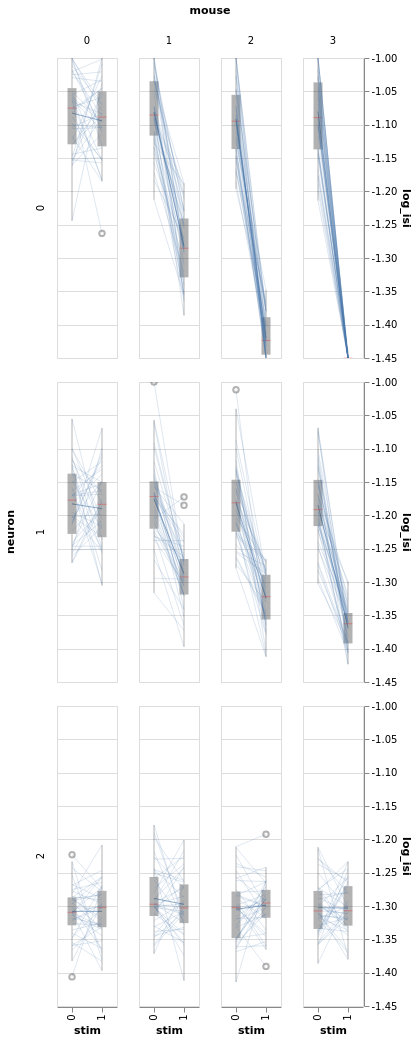

In [5]:

reload(workflow)
bw = workflow.BayesWindow(df, y='log_isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
bw.chart_data_box_detail

In [ ]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',)

In [14]:
self.data_and_posterior['mu_intercept_per_group center interval']

0      0.403412
1      0.403412
2      0.403412
3      0.403412
4      0.403412
         ...   
475         NaN
476         NaN
477         NaN
478         NaN
479         NaN
Name: mu_intercept_per_group center interval, Length: 480, dtype: float64

In [12]:
self=bw
self.data_and_posterior.columns[self.data_and_posterior.columns.str.contains('slope')]

Index(['sigma_slope_per_condition higher interval',
       'sigma_slope_per_condition lower interval',
       'sigma_slope_per_condition center interval'],
      dtype='object')

In [10]:
self.trace.posterior.data_vars

Data variables:
    mu_intercept_per_group     (chain, draw, mu_intercept_per_group_dim_0) float32 ...
    sigma_intercept_per_group  (chain, draw) float32 2.4245692e-05 ... 1.5391...
    sigma_obs                  (chain, draw) float32 0.859426 ... 0.8828244
    sigma_slope_per_condition  (chain, draw) float32 0.015656436 ... 0.015702356
    slope_per_condition        (chain, draw, combined_condition) float32 -75....

# data_details

In [5]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

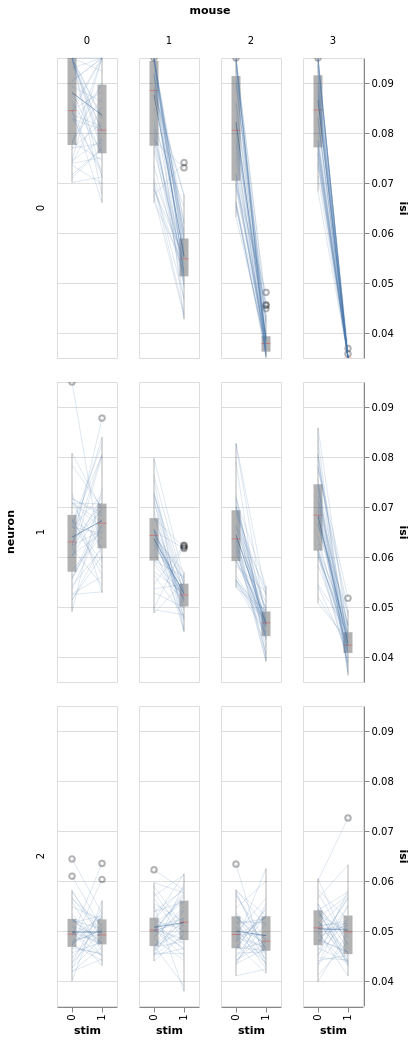

In [6]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_data_slopes

This should trigger a warning. 'i_trial' in detail=

In [3]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse',));
bw.chart_posterior


We lost some detail in the data. This does not matter for posterior, but plotting data may suffer. Did was there another index column (like i_trial) other than ['neuron_x_mouse', 'mouse']?


No warning should be displayed below:

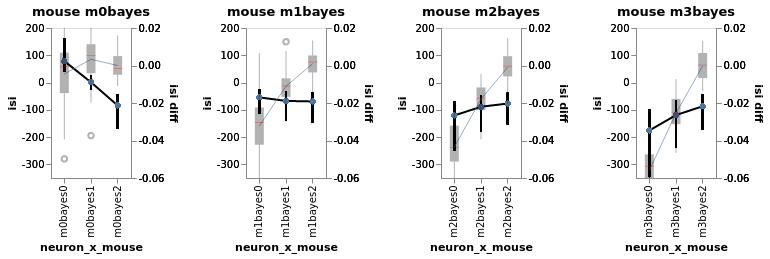

In [4]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial' )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract')

bw.chart_posterior


# data_details

In [5]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

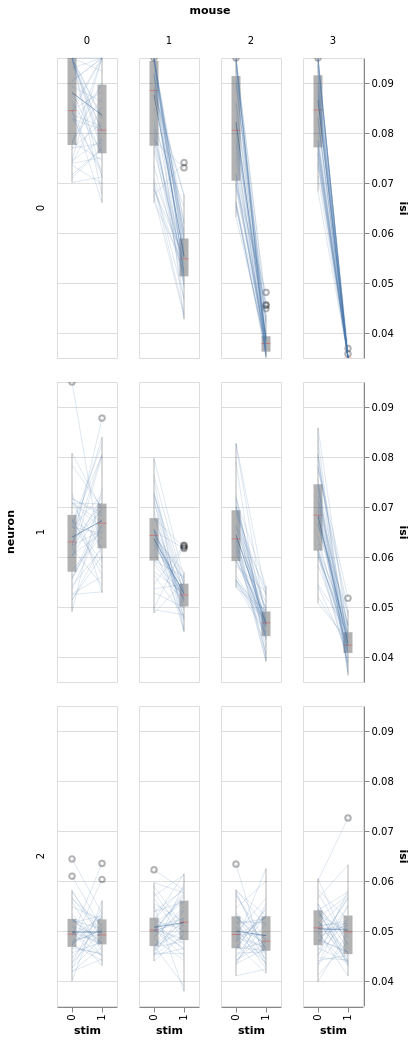

In [6]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

## Without detail:

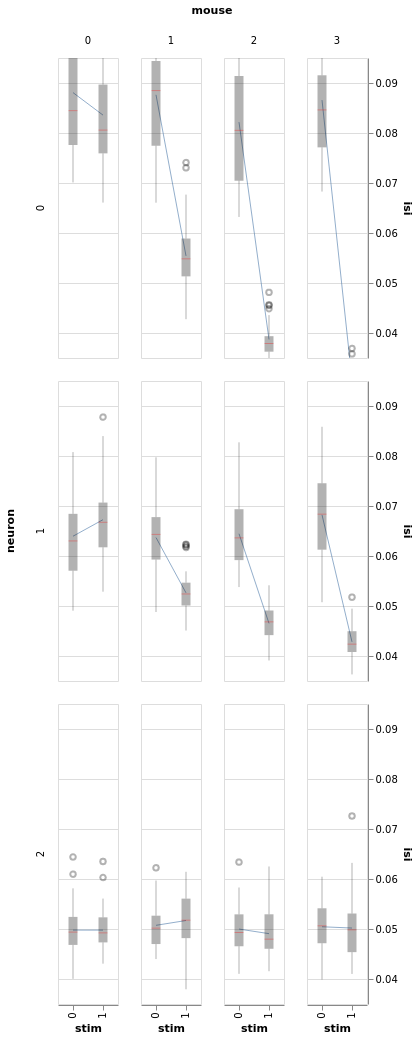

In [7]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', )
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_posterior_charts

In [ ]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O',column='mouse')

In [ ]:
bw.chart_posterior

## More manual faceting and composing

In [14]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O')

n(Divergences) = 5


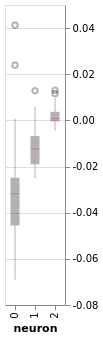

In [15]:
x='neuron'
y='isi diff'
alt.Chart(bw.data_and_posterior).mark_boxplot(
            clip=True, opacity=.3, size=9, color='black',
            median=alt.MarkConfig(color='red', strokeWidth=20)
        ).encode(
            x=x,
            y=alt.Y(f'{y}:Q',
                    axis=alt.Axis(orient='right', title=''),
                    )
        )

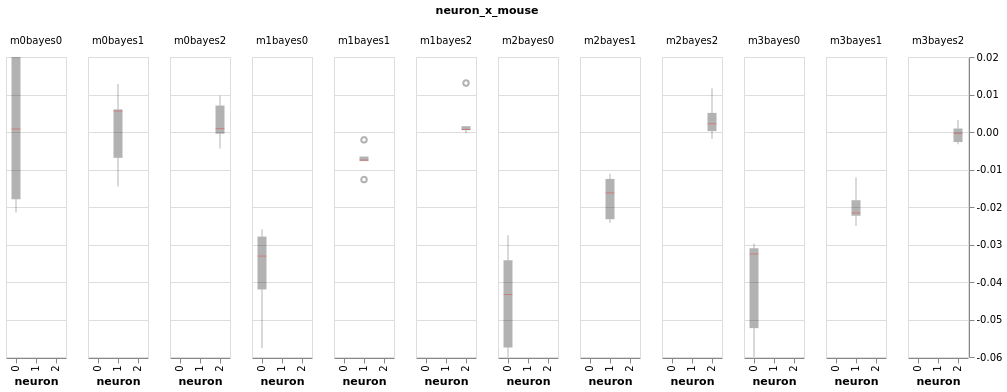

In [16]:
bw.chart_data_boxplot.facet(column='neuron_x_mouse')

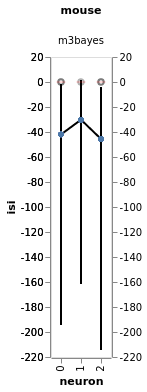

In [17]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse')

Fix:

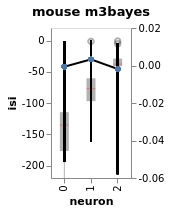

In [18]:
from bayes_window.visualization import facet
facet(alt.layer(bw.chart_data_boxplot,bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

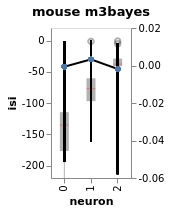

In [19]:
facet((bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

In [20]:
#bw.facet(bw,column='mouse_code')

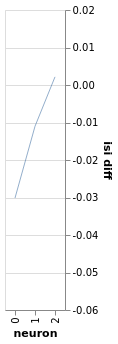

In [21]:
bw.charts[2]

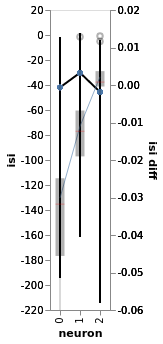

In [22]:
alt.layer(*bw.charts).resolve_scale(y='independent')

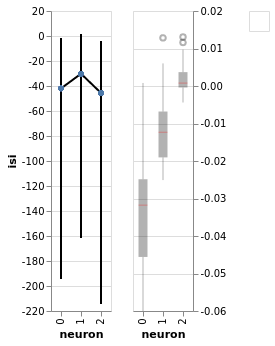

In [23]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

If x axis, can't use `+`. Must call `alt.layer()`:

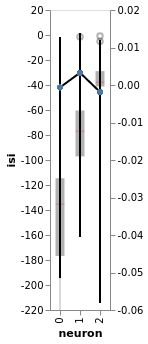

In [24]:
(bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent')

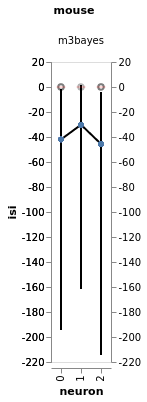

In [25]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse').resolve_scale(y='independent')

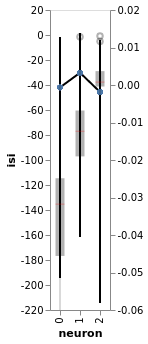

In [26]:
alt.layer(bw.chart_posterior,bw.chart_data_boxplot).resolve_scale(y='independent')

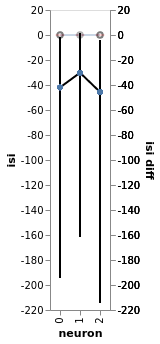

In [27]:
bw.plot(x='neuron:O')

In [28]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))
bw.create_posterior_charts()

n(Divergences) = 9
We lost some detail in the data. This does not matter for posterior, but plotting data may suffer. Did was there another index column (like i_trial) other than ['neuron', 'mouse']?


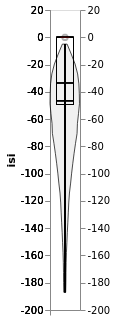

In [29]:
alt.layer(*bw.charts)

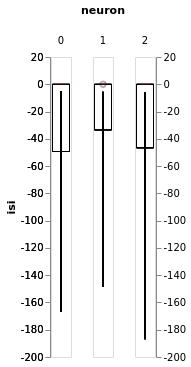

In [30]:
alt.layer(*bw.charts_for_facet).facet(column='neuron')

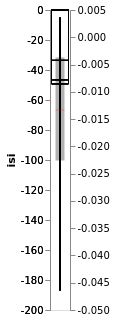

In [31]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

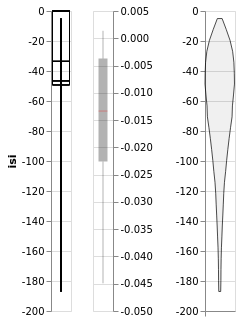

In [32]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

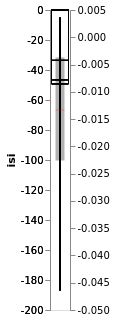

In [33]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

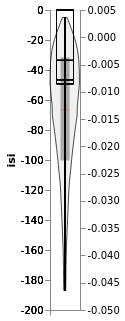

In [34]:
(bw.chart_posterior+bw.chart_data_boxplot+bw.chart_posterior_kde).resolve_scale(y='independent')

In [35]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
bw = BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))


In [36]:
bw.create_posterior_charts(x='neuron:O')

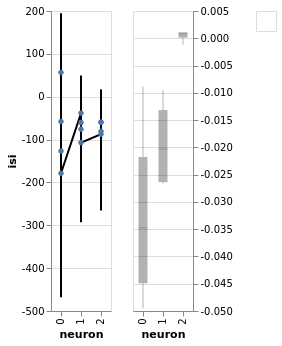

In [37]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

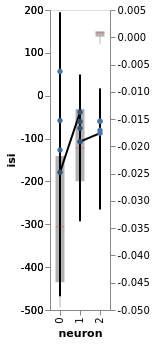

In [38]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

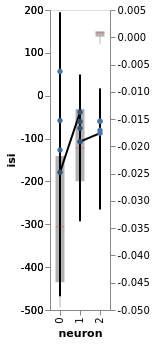

In [39]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

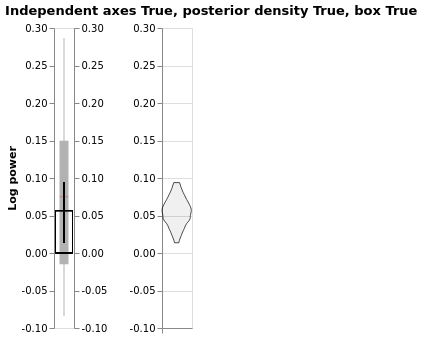

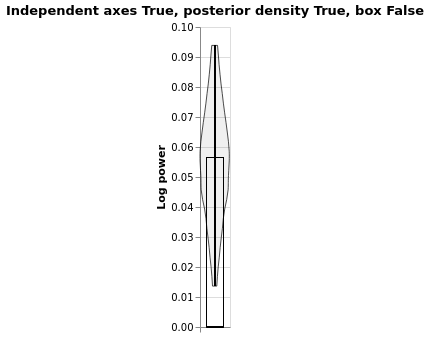

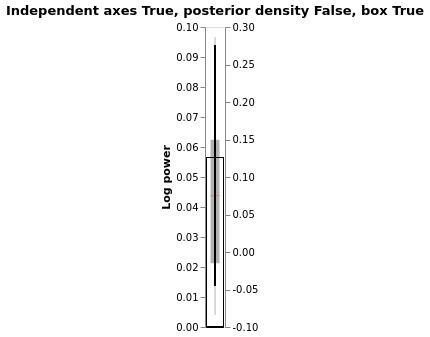

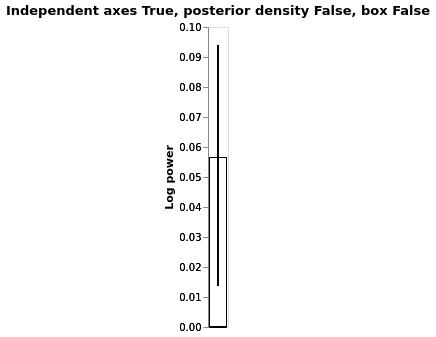

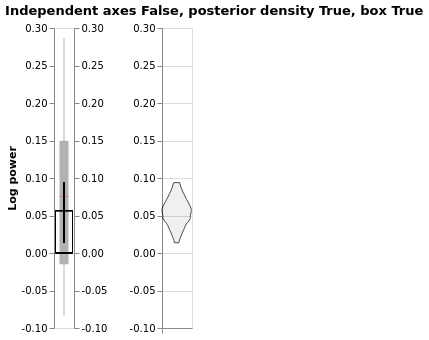

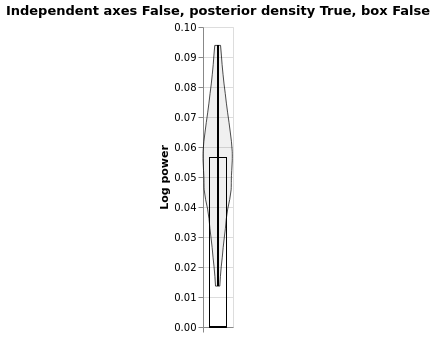

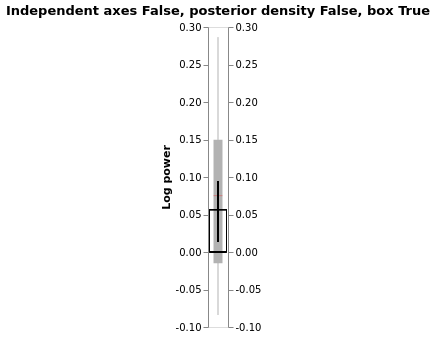

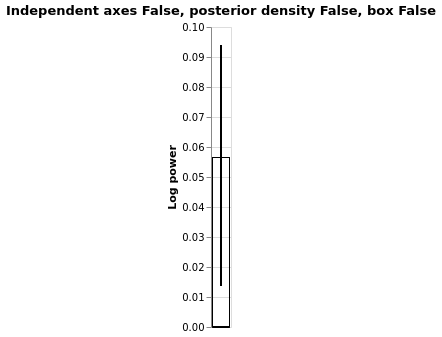

In [42]:
# Draw some fake data:
df1, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=9, n_trials=30)

# Show off all display methods:
import itertools 
# Initialize and fit again:
window=BayesWindow(df1, y='Log power', treatment='stim', group='mouse')
window.fit_slopes(model=models.model_hierarchical,add_group_slope=False,
                  do_make_change='subtract', dist_y='student');
# Plot:
for ia, ap, ab in itertools.product([True,False], [True,False], [True,False], ):
    window.plot(independent_axes=ia,x=':O',
                add_posterior_density=ap,add_box=ab
               ).properties(title=f'Independent axes {ia}, posterior density {ap}, box {ab}').display()